# Setup

In [9]:
%load_ext autoreload
%autoreload 2

import crispr as cr
from crispr import Omics
from anndata import AnnData
import scanpy as sc
import copy

resolution = 1.2
col_sample_id = "orig.ident"
kws_harmony = {"plot_convergence": True, "random_state": 1618}
col_guide_rna = "feature_call"
col_num_umis = "num_umis"
guide_split = "-"
key_control_patterns = ["CTRL"]
key_control, key_treatment = "NT", "KD"
col_guide_rna_new = "target_gene_name"

kws_process_guide_rna = dict(feature_split="|", guide_split="-",
                             key_control_patterns=["CTRL"],
                             remove_multi_transfected=True,
                             min_n_target_control_drop=None,
                             max_pct_control_drop=75,
                             min_pct_dominant=80, min_pct_avg_n=40)
kws_init = {"assay": None, "assay_protein": None,
            "col_gene_symbols": "gene_symbols",
            "col_cell_type": "majority_voting",
            "col_sample_id": col_sample_id,
            "key_control": key_control, "key_treatment": key_treatment,
            "col_condition": col_guide_rna_new}  # initialization arguments
kws_crispr = {
    "kws_process_guide_rna": kws_process_guide_rna,
    "col_guide_rna": "feature_call", "col_num_umis": "num_umis",
    "col_perturbed": "perturbation"}  # CRISPR initialization arguments
kws_umap = {"min_dist": 0.3}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, "min_disp": 0.5},
          "target_sum": 1e4, "cell_filter_pmt": [0, 15], "kws_scale": "z",
          "regress_out": None, "kws_umap": kws_umap,
          "cell_filter_ngene": [200, 7000],
          "cell_filter_ncounts": [500, 60000], "gene_filter_ncell": [3, None],
          }
kws_cluster = {"method_cluster": "leiden", "resolution": resolution,
               "kws_neighbors": None, "kws_umap": kws_umap, "kws_cluster": {},
               "kws_pca": {"n_comps": 20, "use_highly_variable": True}}
file_path = {"HH03": {"directory": "data/crispr-screening/HH03"},
             "HH04": {"directory": "data/crispr-screening/HH04"},
             "HH05": {"directory": "data/crispr-screening/HH05"},
             "HH06": {"directory": "data/crispr-screening/HH06"}}
            #  "CR4": {"directory": "data/crispr-screening/HH-Hu-CR4"},
            #  "CR5": {"directory": "data/crispr-screening/HH-Hu-CR5"}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Integrated Object

We first have to create preprocessed and clustered individual objects, then integrate them with Harmony.

## Integrate Data

If `kws_pp` and/or `kws_cluster` = None, then preprocessing and/or clustering, respectively, will not be performed on individual objects.

## Create Overall Object



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'kws_process_guide_rna': {'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'col_guide_rna_new': 'target_gene_name', 'feature_split': '|', 'guide_split': '-', 'key_control_patterns': ['CTRL'], 'remove_multi_transfected': True, 'min_n_target_control_drop': None, 'max_pct_control_drop': 75, 'min_pct_dominant': 80, 'min_pct_avg_n': 40}}.

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="orig.ident"
col_batch="orig.ident"
col_subject=None
col_condition="target_gene_name"
col_num_umis="num_umis"
key_control="NT"
key_treatment="KD"


<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'kws_process_guide_rna': {'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'col_guide_rna_new': 'target_gene_name', 'feature_split': '|', 'guide_split': '-', 'key_control_patterns': ['CTRL'], 'remove_multi_transfected': True, 'min_n_target_co

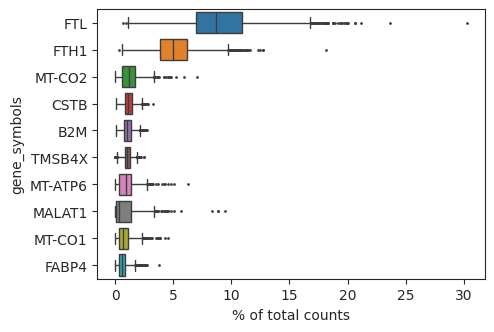



Cell Counts: Initial


Observations: 3632



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


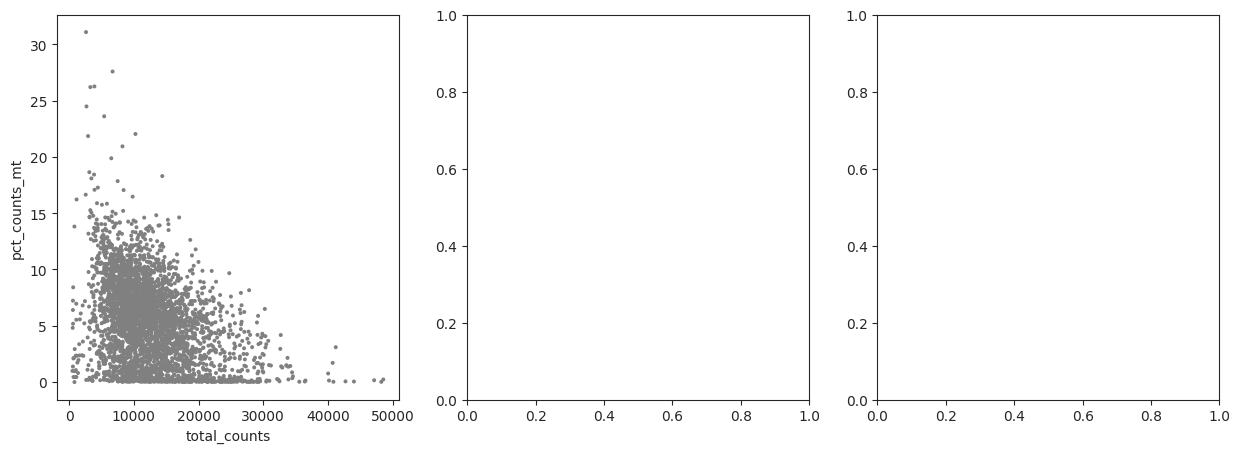


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 3632



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%                6.0     0.001652           0.001651              99.834802   
75%              291.0     0.088381           0.084691             100.000000   
25%                0.0     0.000000           0.000000              91.987885   

     total_counts  log1p_total_counts  
50%           6.0            1.945910  
75%         321.0            5.774551  
25%           0.0            0.000000  





Cell Counts: Post-Basic Filter


Observations: 3632



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              197.0     0.058921           0.057250              94.575991   
75%              947.0     0.333700           0.287957              99.476872   
25%               19.0    

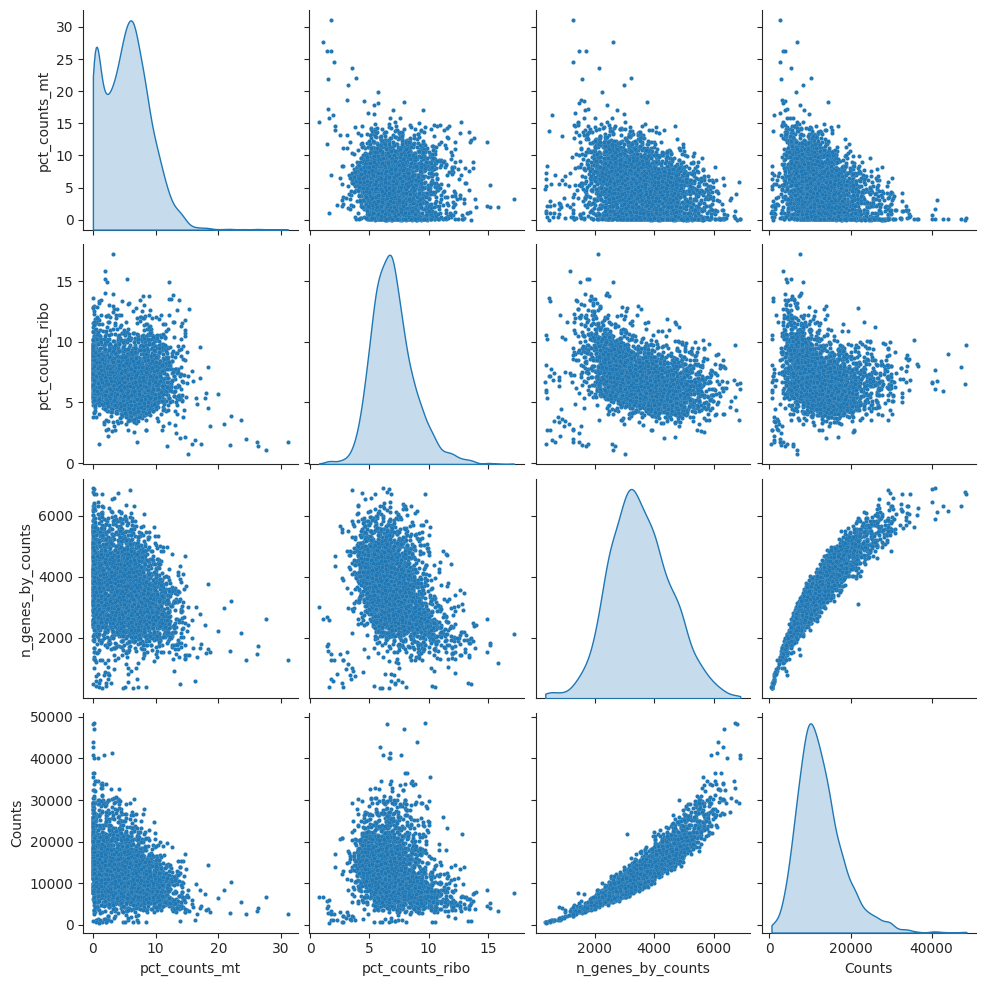

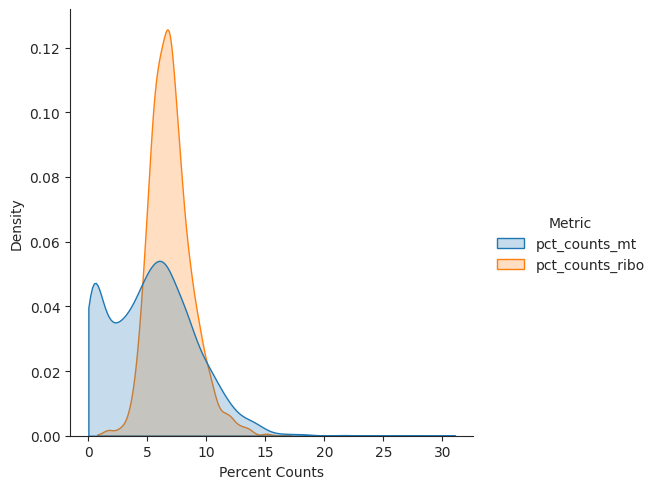

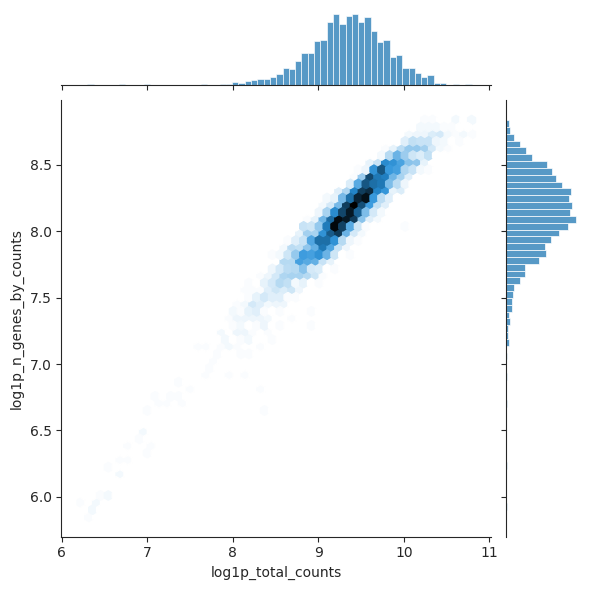

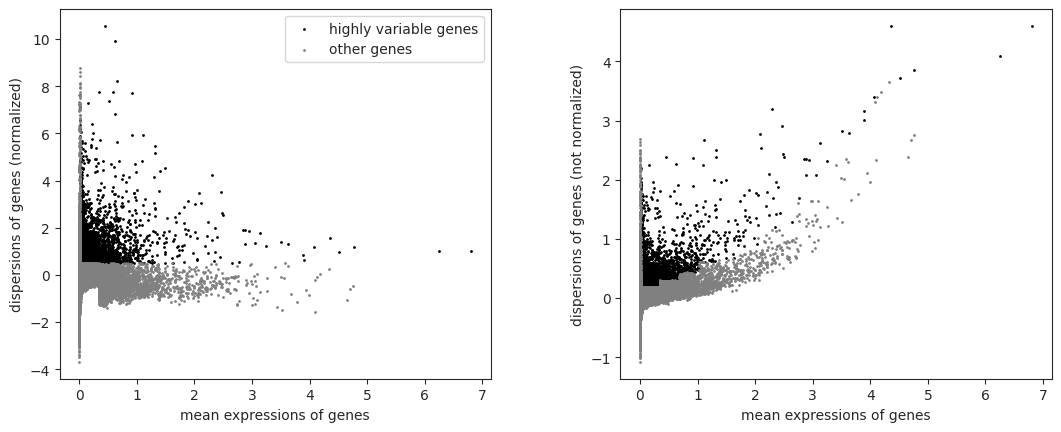


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 3604



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              198.0     0.059196           0.057510              94.548458   
75%              949.0     0.333976           0.288164              99.476872   
25%               19.0     0.005507           0.005492              73.871145   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
50%         215.0            5.375278    197.0  0.045432     0.036993   
75%        1213.0            7.101676    945.0  0.234277     0.188899   
25%          20.0            3.044523     19.0  0.004275    -0.075188   

     dispersions_norm  
50%         -0.132068  
75%          0.315027  
25%  

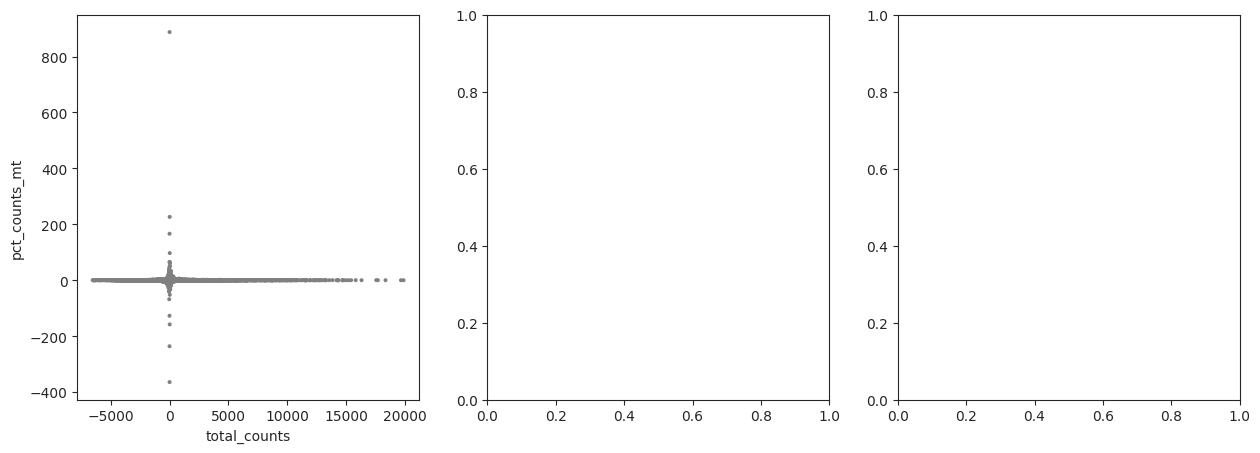

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH03 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


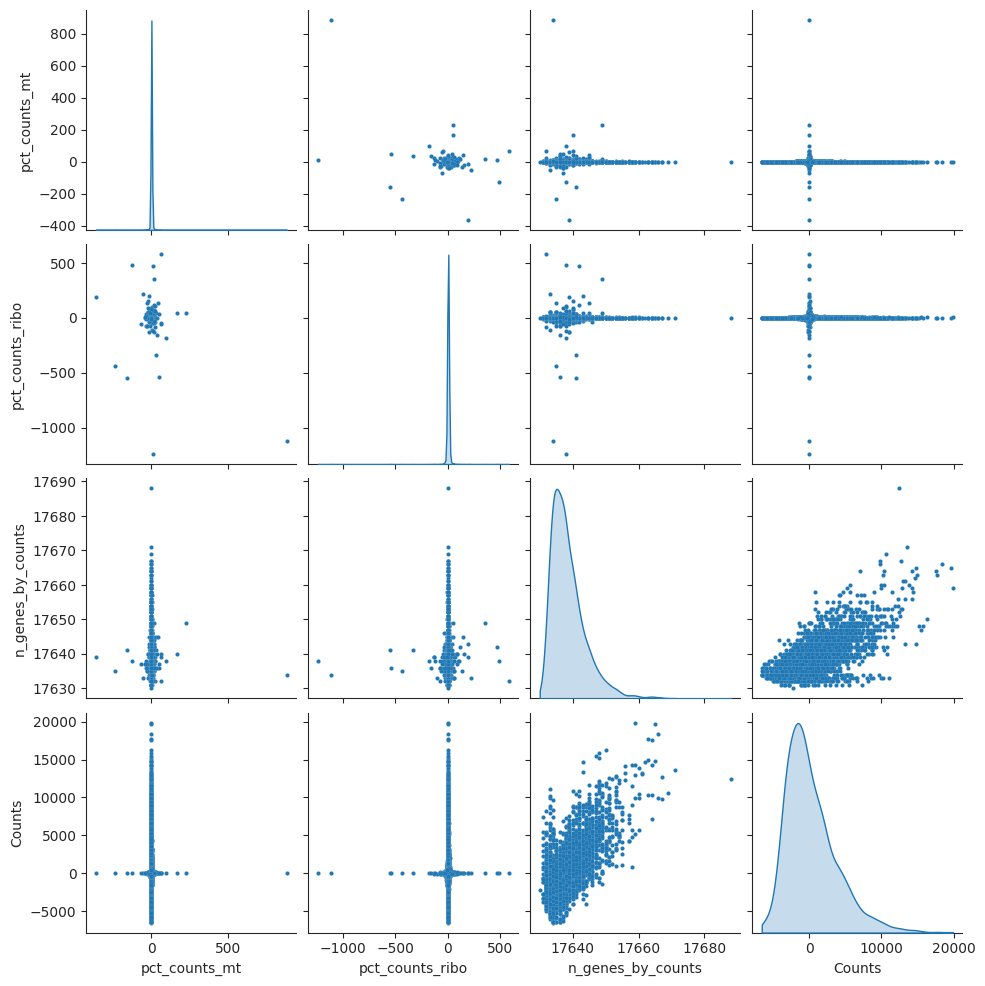

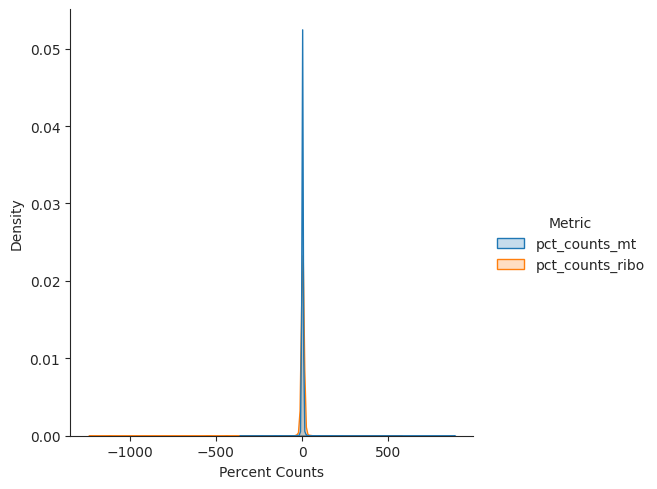

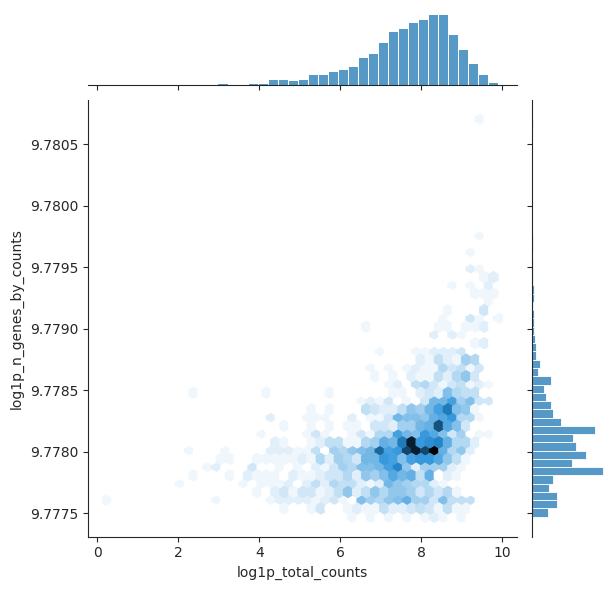

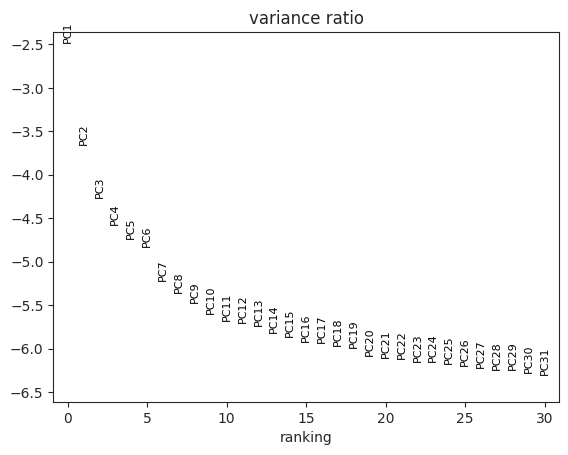

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


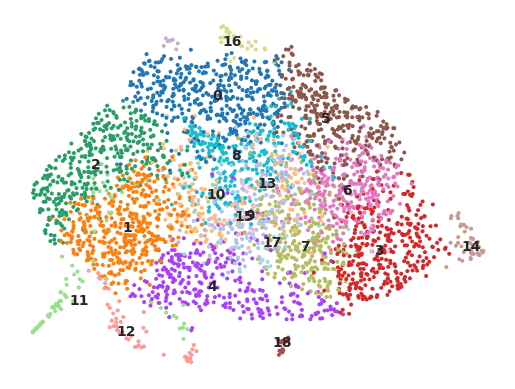


<<< PREPROCESSING HH04 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




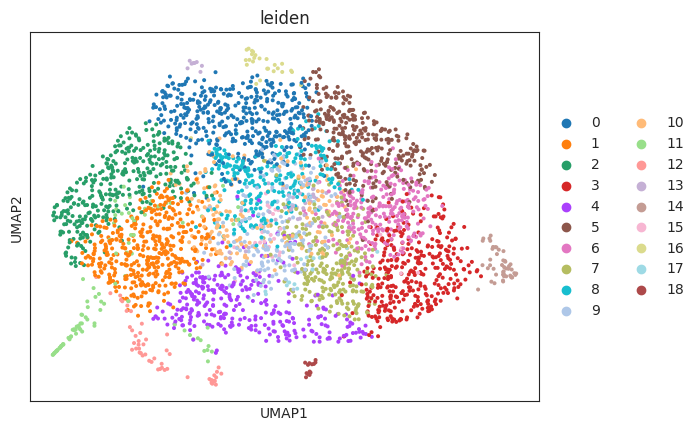

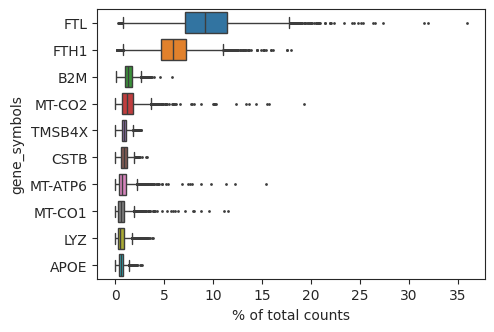



Cell Counts: Initial


Observations: 5623



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


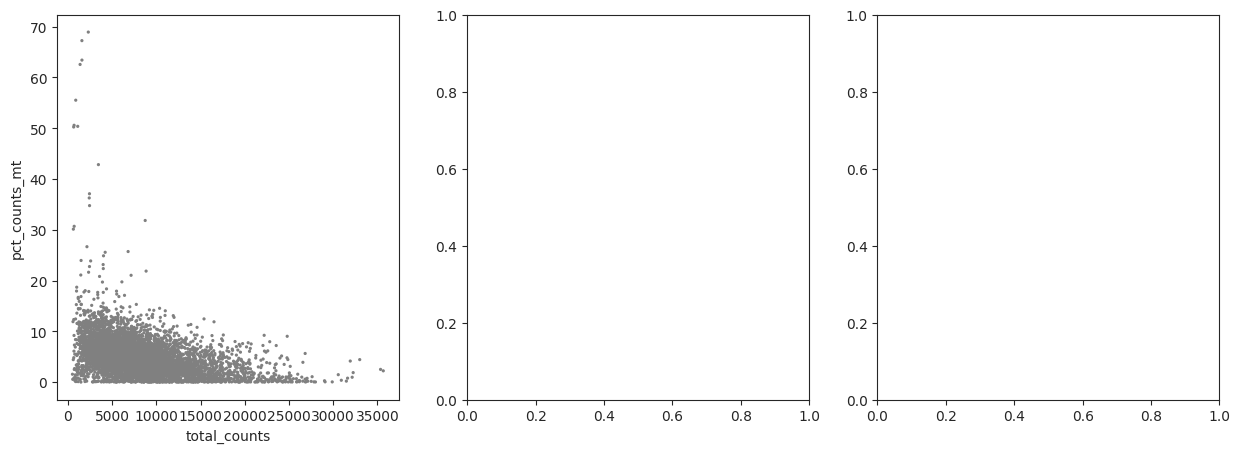


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 5623



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%                5.0     0.001067           0.001066              99.911079   
75%              289.0     0.055664           0.054170             100.000000   
25%                0.0     0.000000           0.000000              94.860395   

     total_counts  log1p_total_counts  
50%           6.0            1.945910  
75%         313.0            5.749393  
25%           0.0            0.000000  





Cell Counts: Post-Basic Filter


Observations: 5623



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              196.0     0.037347           0.036666              96.514316   
75%             1002.0     0.214298           0.194166              99.662102   
25%               19.0    

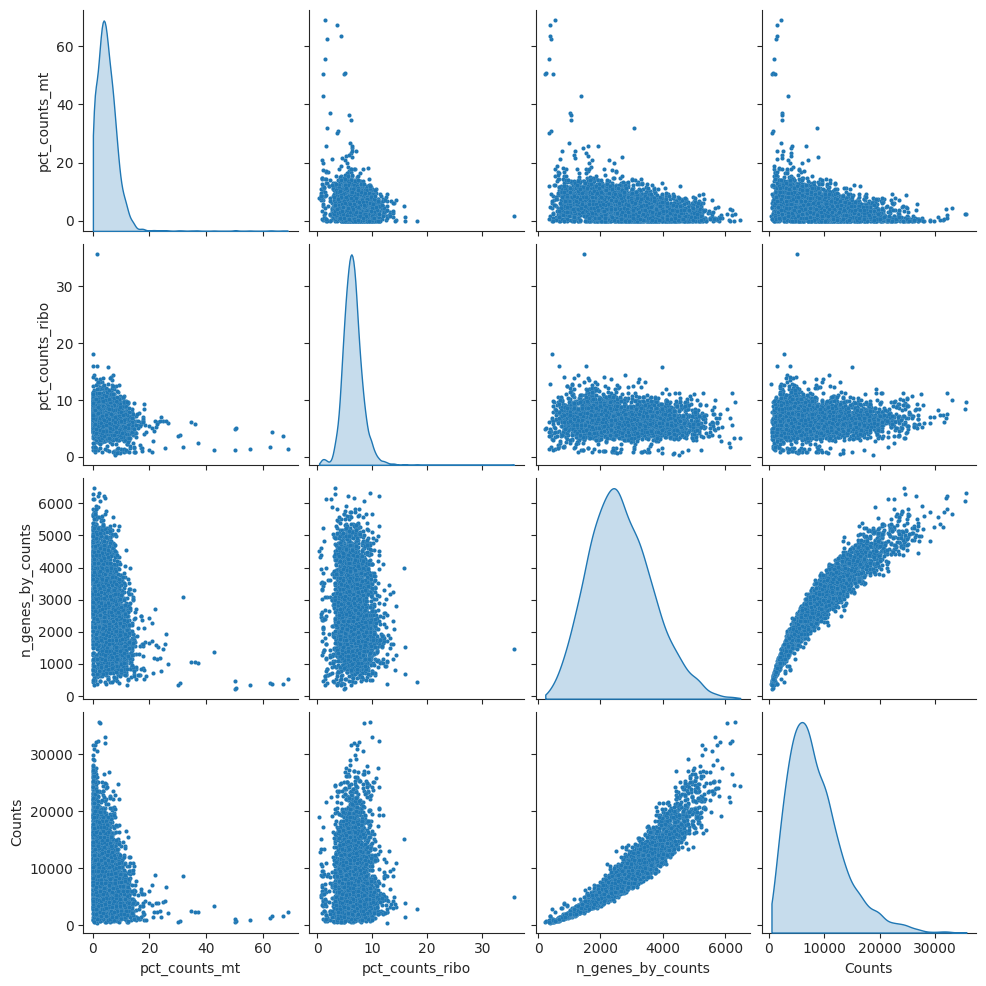

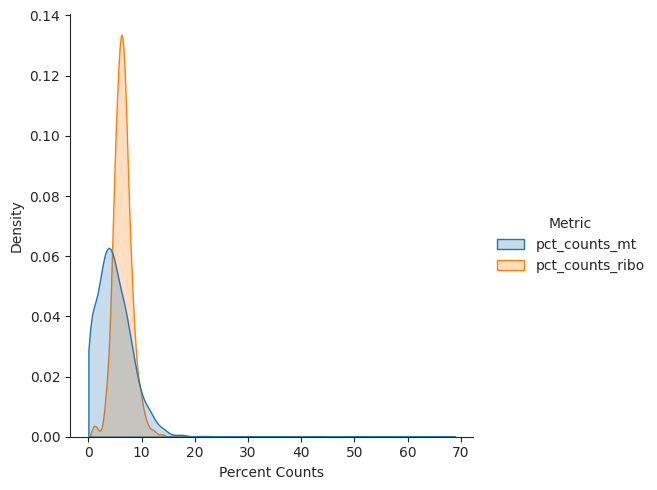

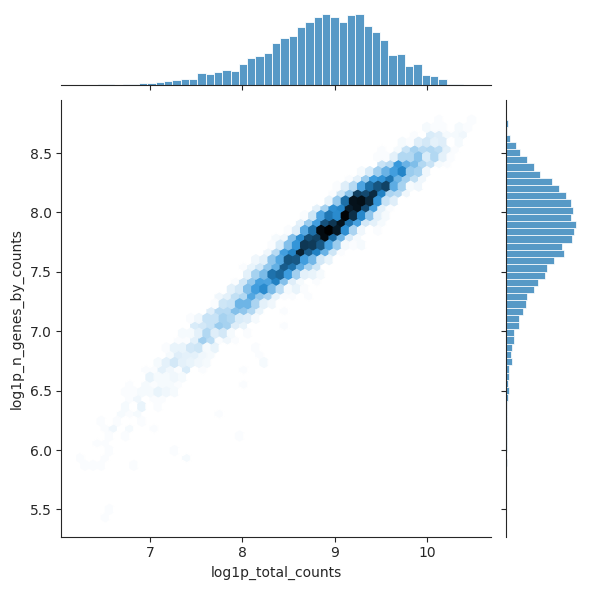

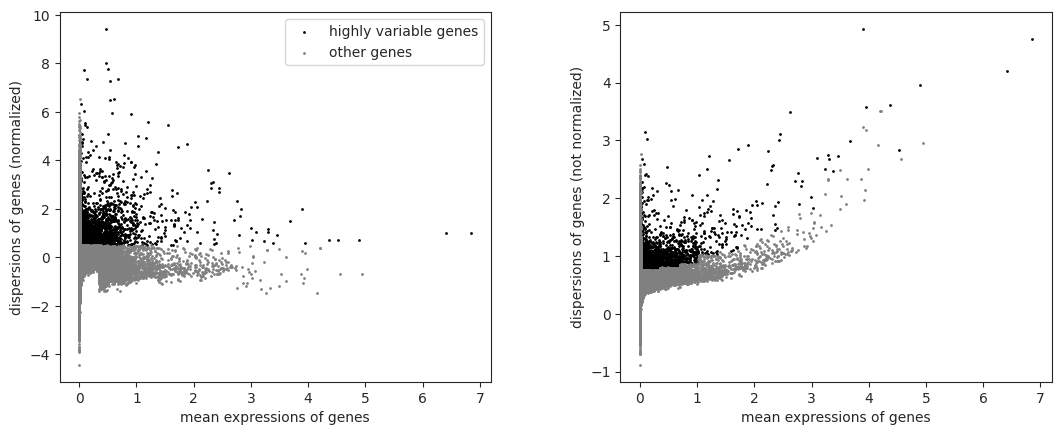


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 5566



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              197.0     0.037524           0.036838              96.496532   
75%             1003.0     0.214476           0.194313              99.662102   
25%               19.0     0.003379           0.003373              82.162547   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
50%         211.0            5.356586    196.0  0.044354     0.609579   
75%        1206.0            7.095893    998.0  0.227964     0.757289   
25%          19.0            2.995732     19.0  0.004227     0.474707   

     dispersions_norm  
50%         -0.052197  
75%          0.432956  
25%  

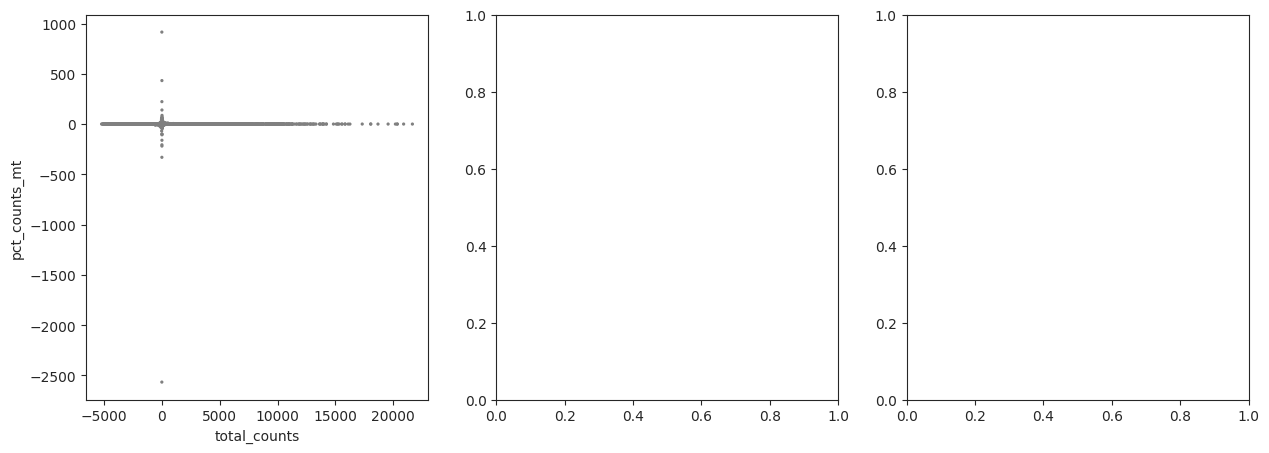

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH04 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


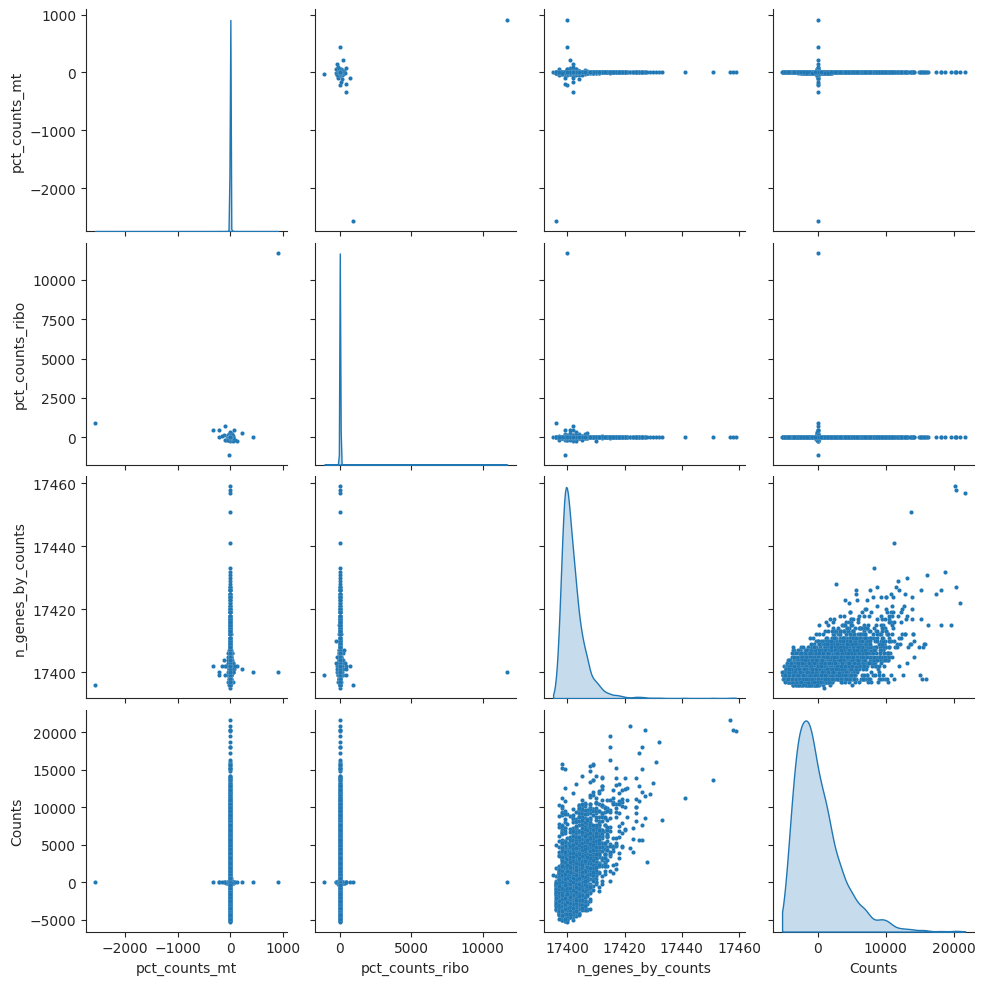

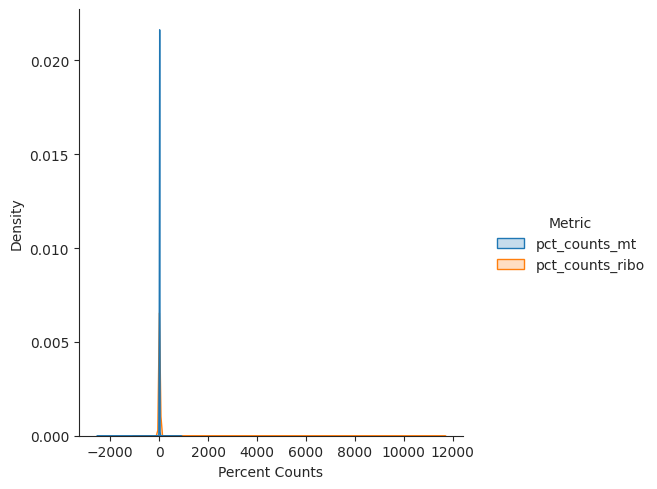

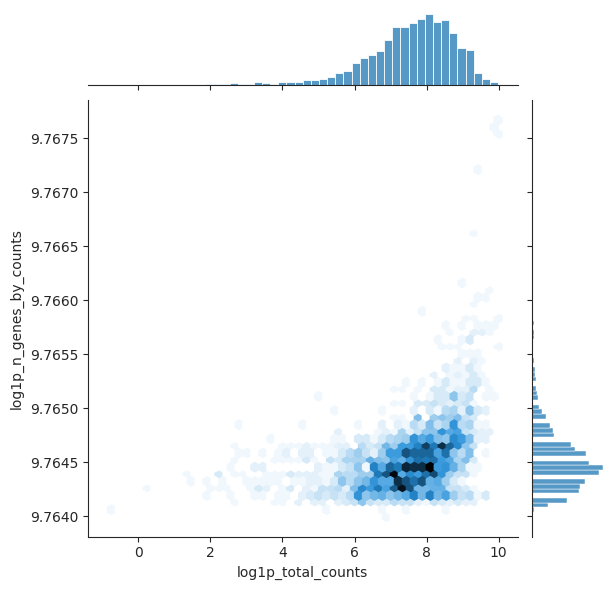

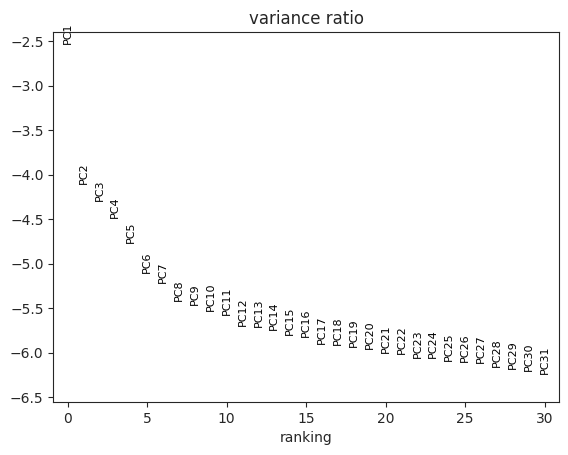

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


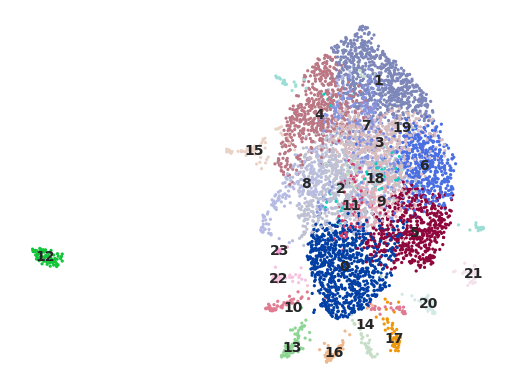


<<< PREPROCESSING HH05 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




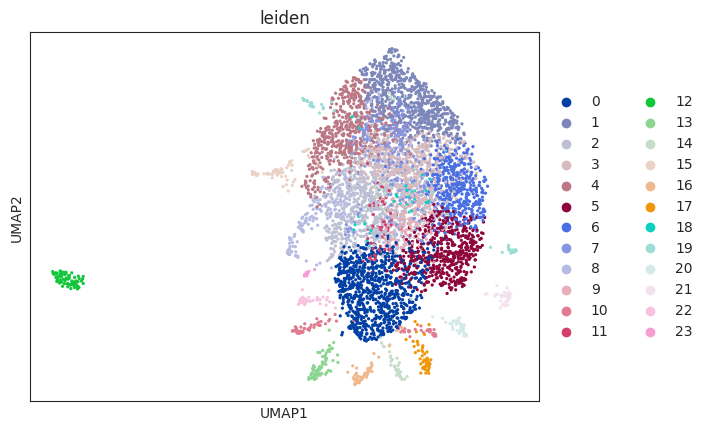

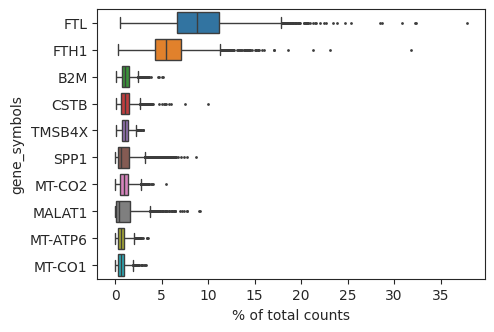



Cell Counts: Initial


Observations: 4416



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


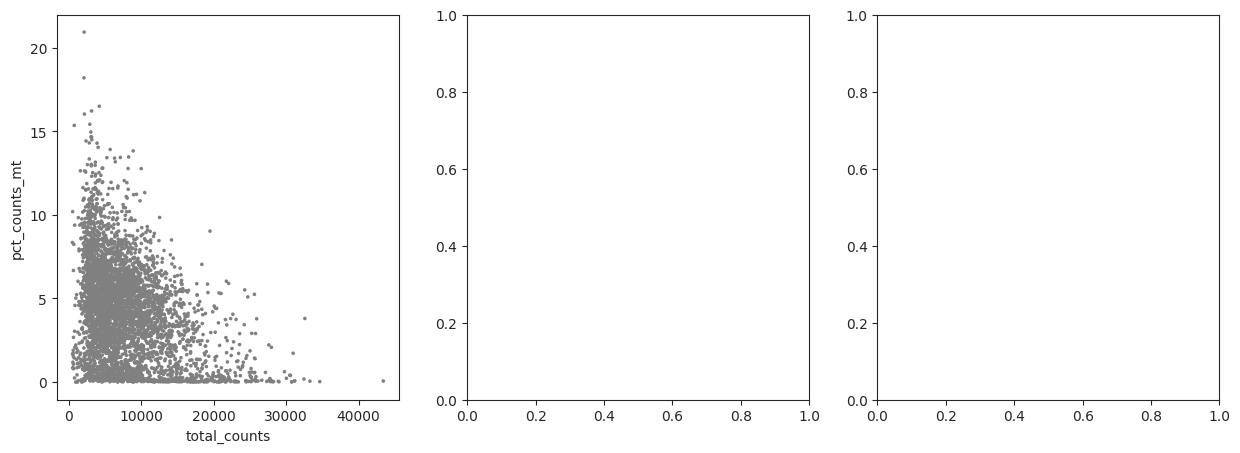


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 4416



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%                5.0     0.001132           0.001132              99.886775   
75%              231.0     0.057065           0.055496             100.000000   
25%                0.0     0.000000           0.000000              94.769022   

     total_counts  log1p_total_counts  
50%           5.0            1.791759  
75%         252.0            5.533390  
25%           0.0            0.000000  





Cell Counts: Post-Basic Filter


Observations: 4416



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              168.0     0.040761           0.039952              96.195652   
75%              779.0     0.212409           0.192610              99.592391   
25%               18.0    

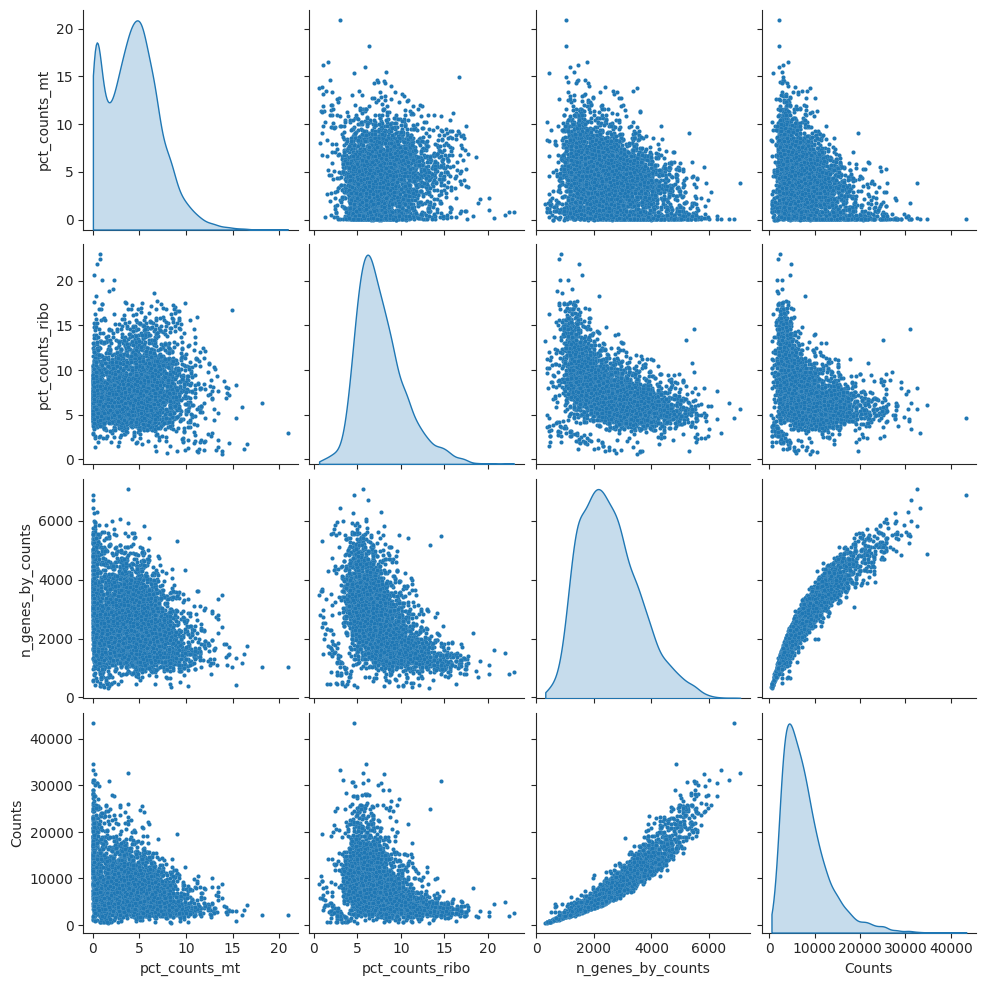

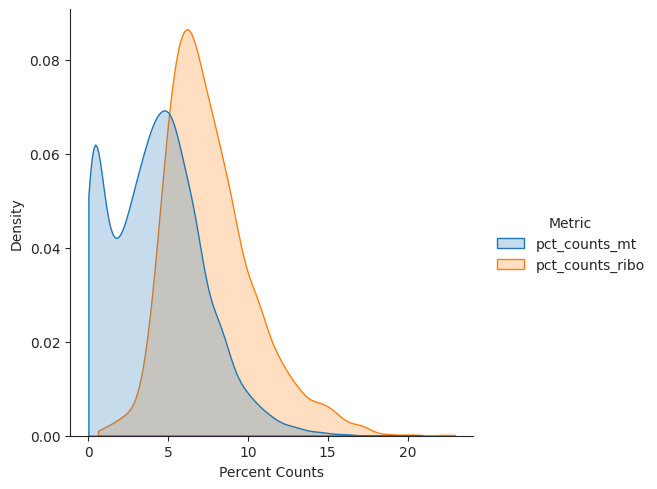

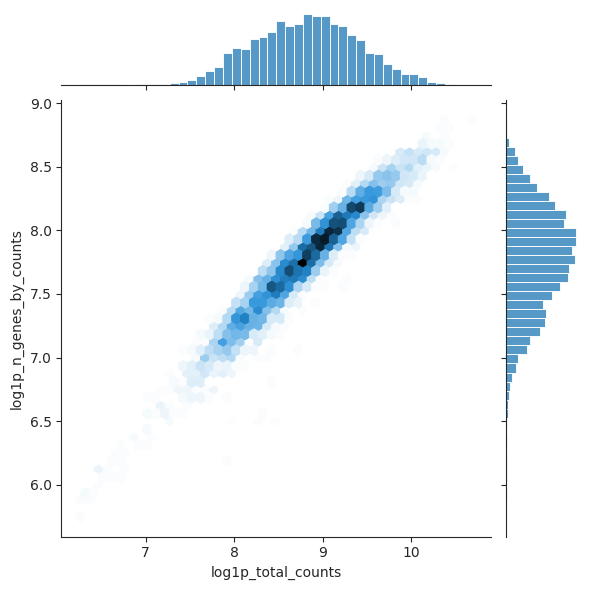

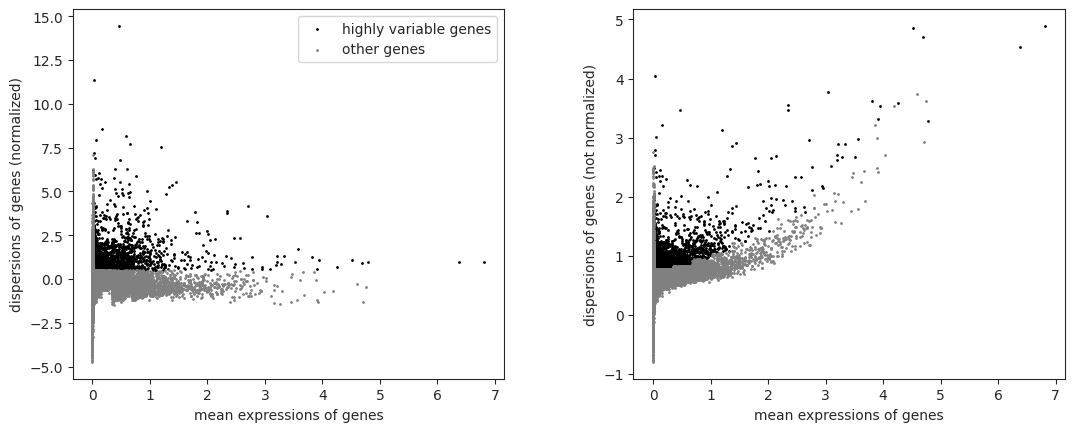


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 4408



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              168.0     0.040761           0.039952              96.195652   
75%              779.0     0.212466           0.192656              99.592391   
25%               18.0     0.004303           0.004293              82.359601   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
50%        180.00            5.198497    167.0  0.051275     0.653108   
75%        938.25            6.845082    778.0  0.236694     0.786978   
25%         19.00            2.995732     18.0  0.005565     0.537412   

     dispersions_norm  
50%         -0.033531  
75%          0.439804  
25%  

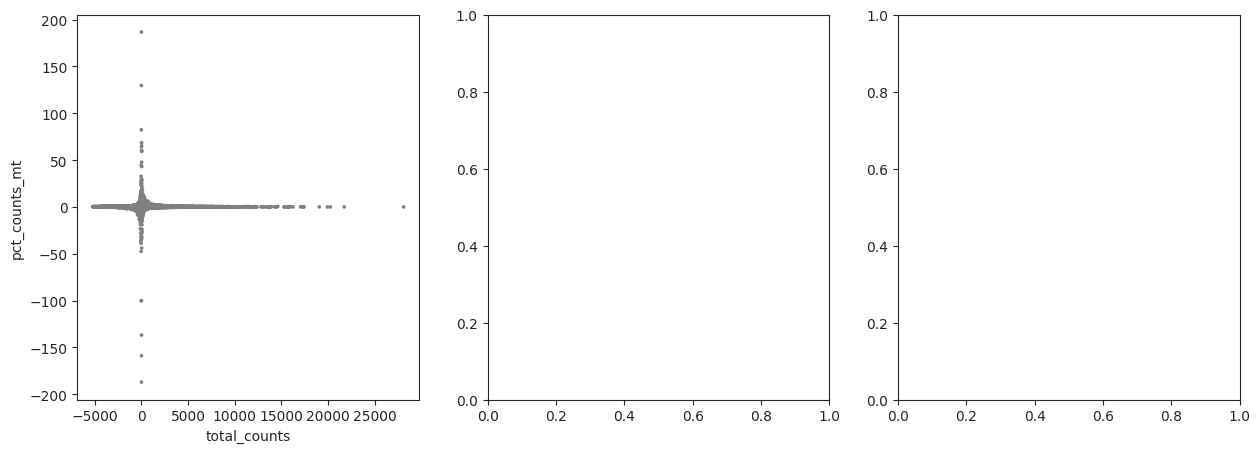

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH05 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


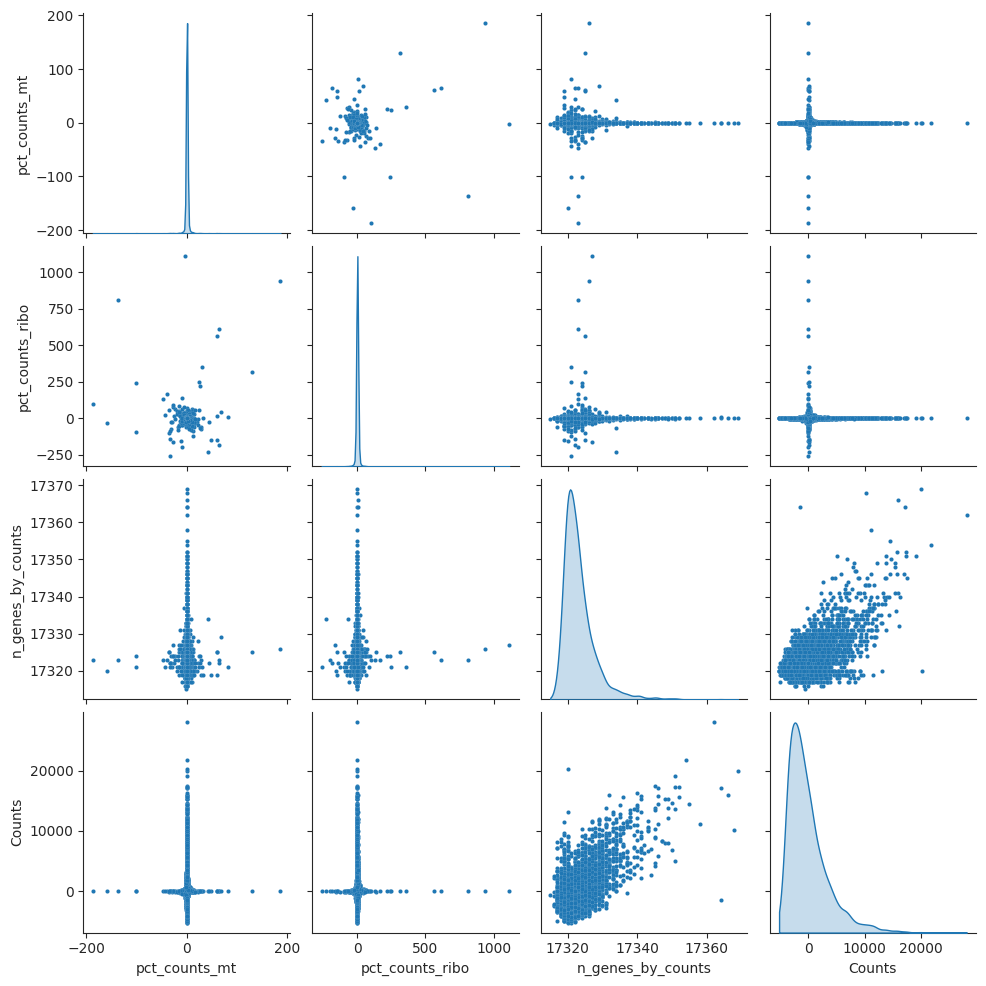

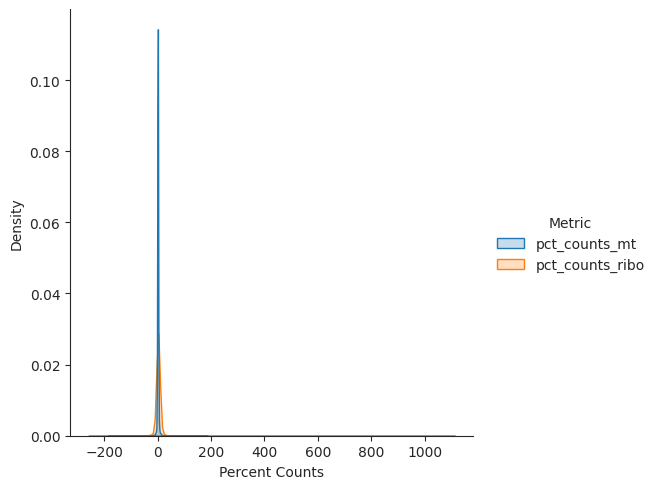

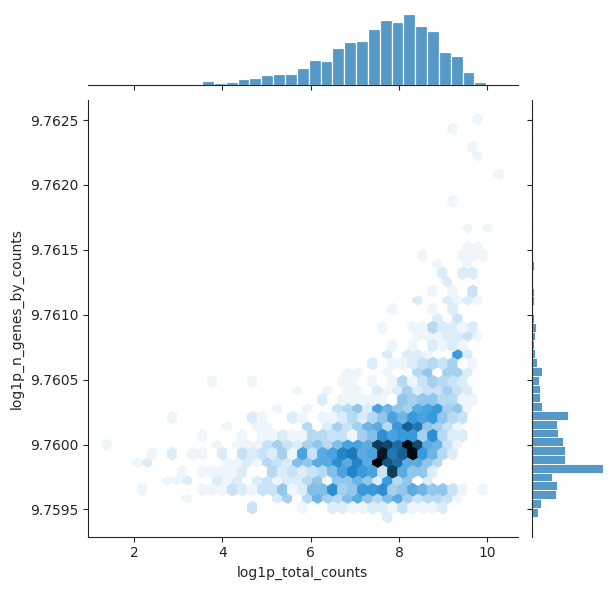

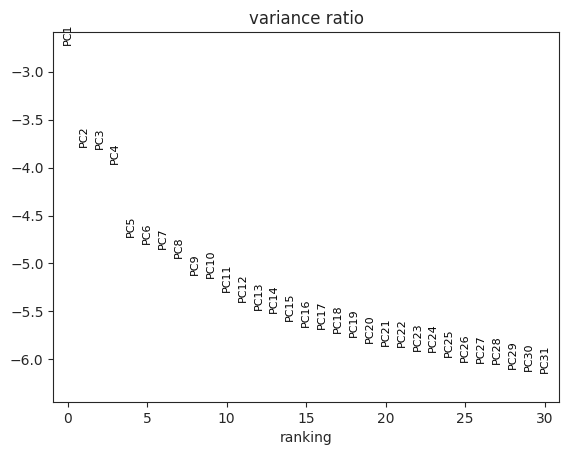

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


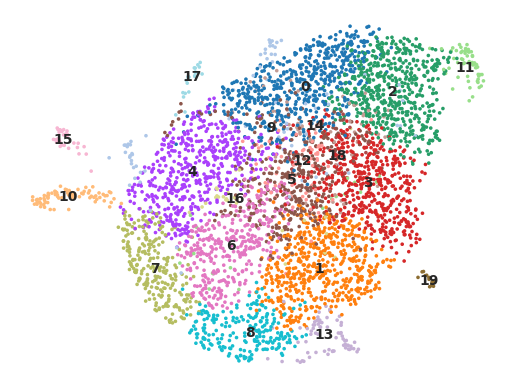


<<< PREPROCESSING HH06 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




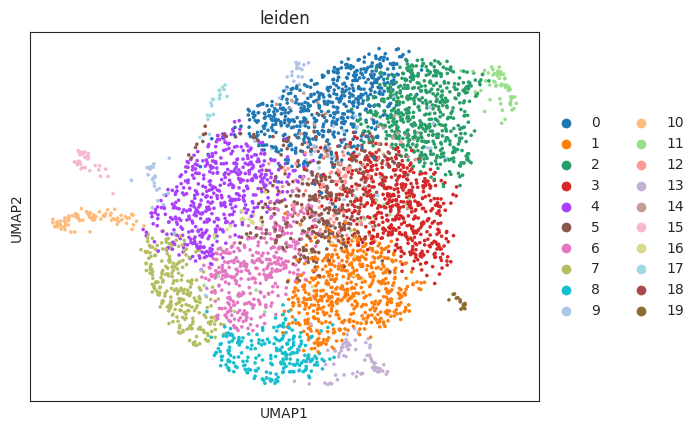

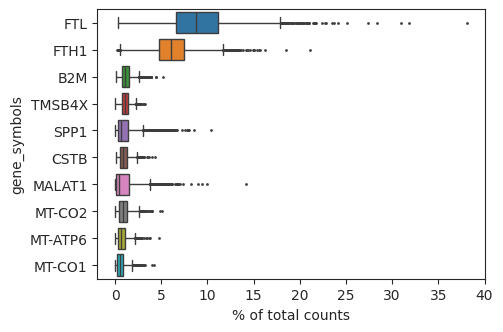



Cell Counts: Initial


Observations: 4132



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


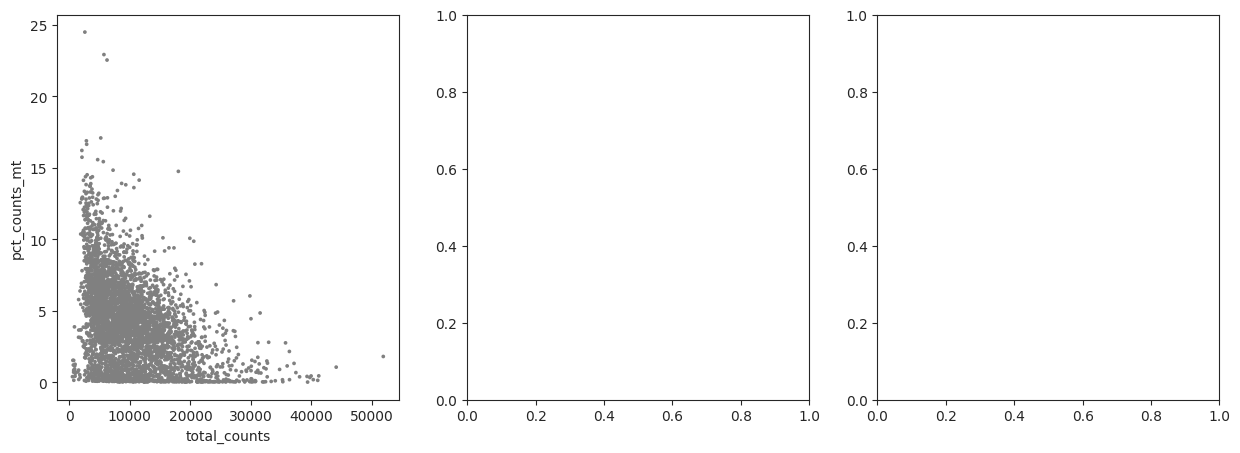


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 4132



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%                6.0     0.001452           0.001451              99.854792   
75%              282.0     0.075750           0.073018             100.000000   
25%                0.0     0.000000           0.000000              93.175218   

     total_counts  log1p_total_counts  
50%           6.0            1.945910  
75%         313.0            5.749393  
25%           0.0            0.000000  





Cell Counts: Post-Basic Filter


Observations: 4132



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              185.0     0.048887           0.047729              95.522749   
75%              895.0     0.273475           0.241750              99.564376   
25%               18.0    

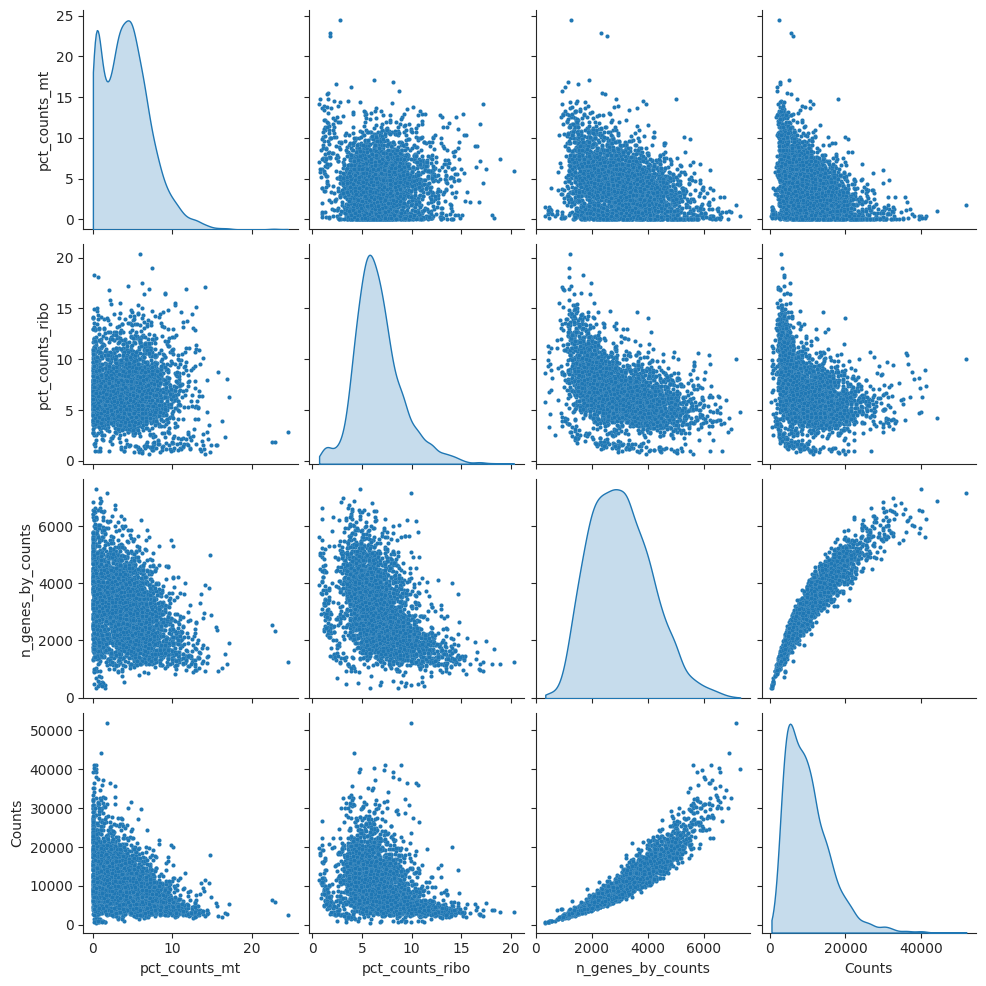

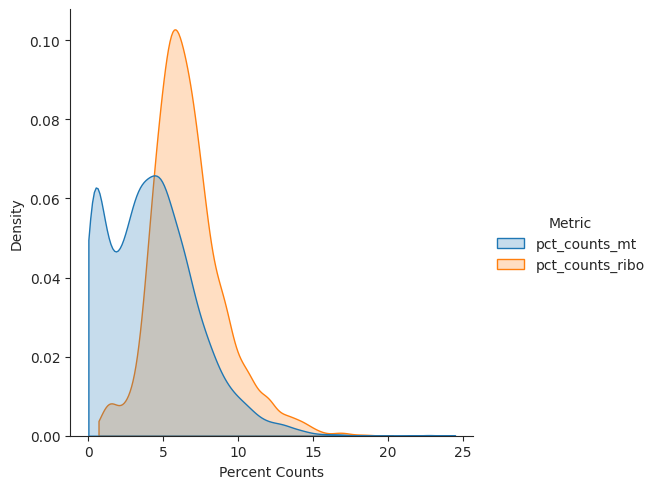

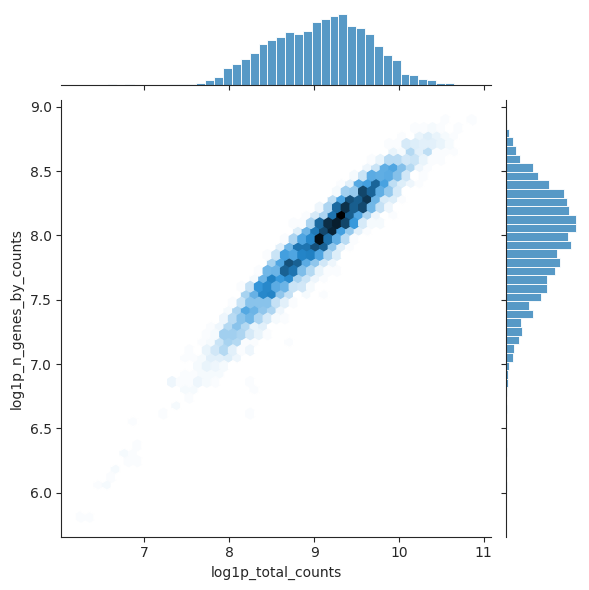

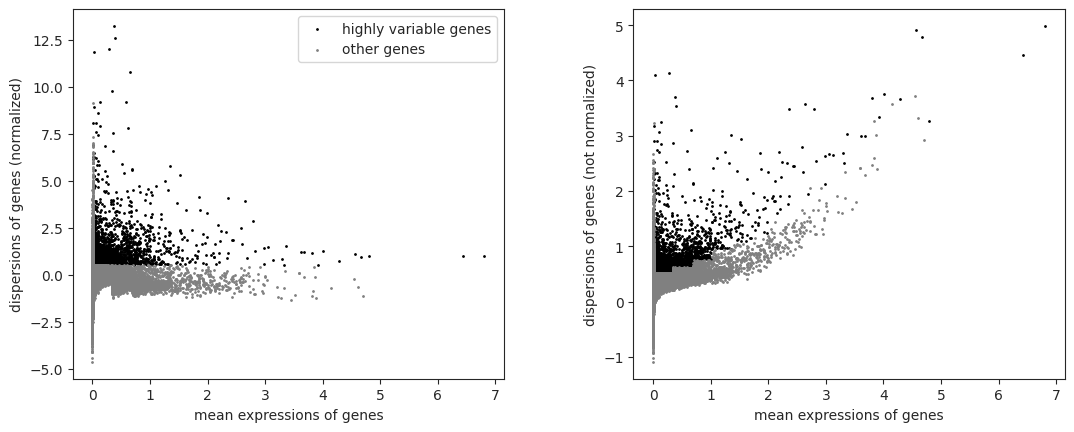


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 4120



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
50%              186.0     0.049129           0.047960              95.498548   
75%              896.0     0.273717           0.241940              99.564376   
25%               18.0     0.004598           0.004588              78.315586   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
50%         203.0            5.318120    185.0  0.048245     0.393173   
75%        1131.0            7.031741    893.0  0.239091     0.530834   
25%          19.0            2.995732     18.0  0.004741     0.280066   

     dispersions_norm  
50%         -0.047890  
75%          0.390221  
25%  

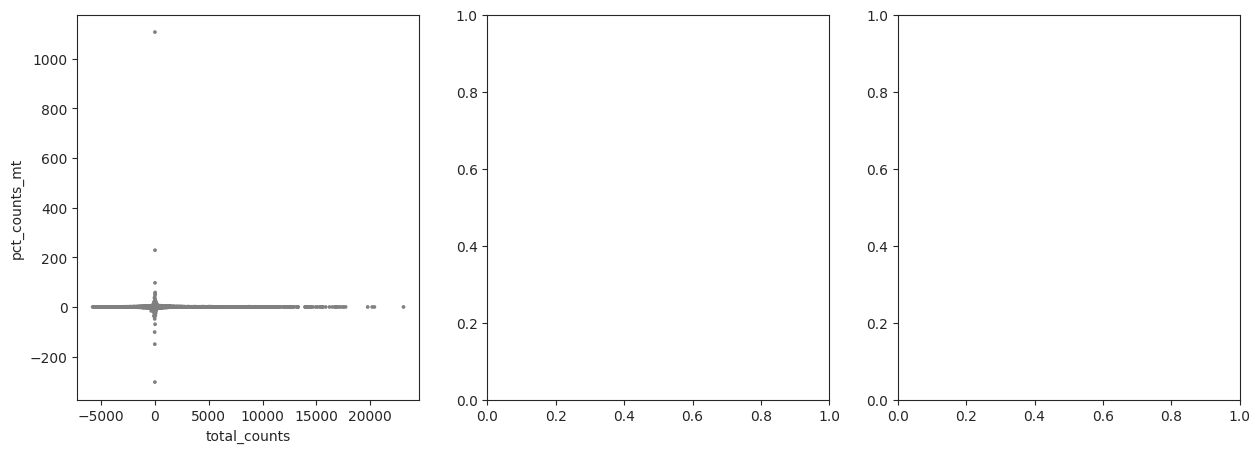

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH06 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


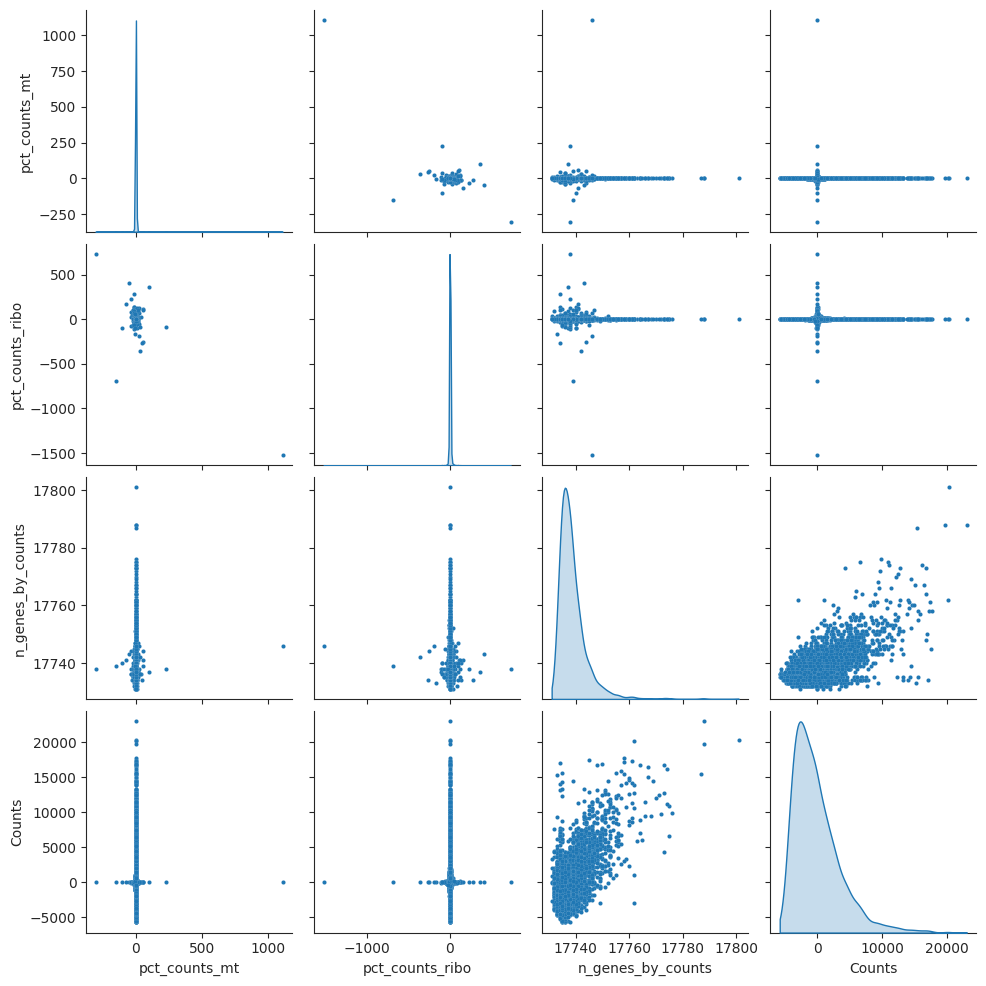

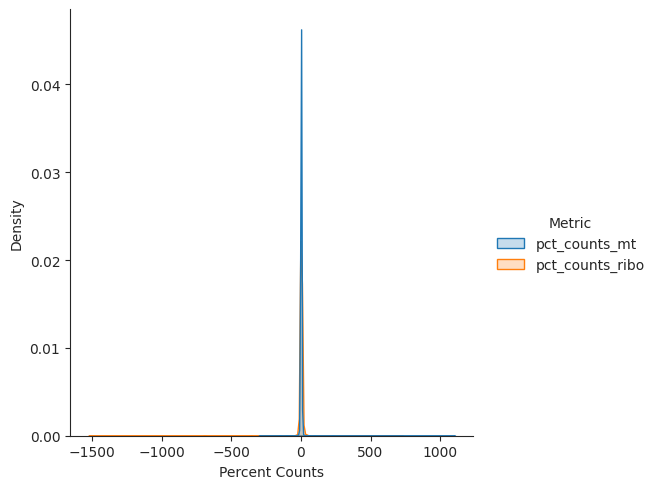

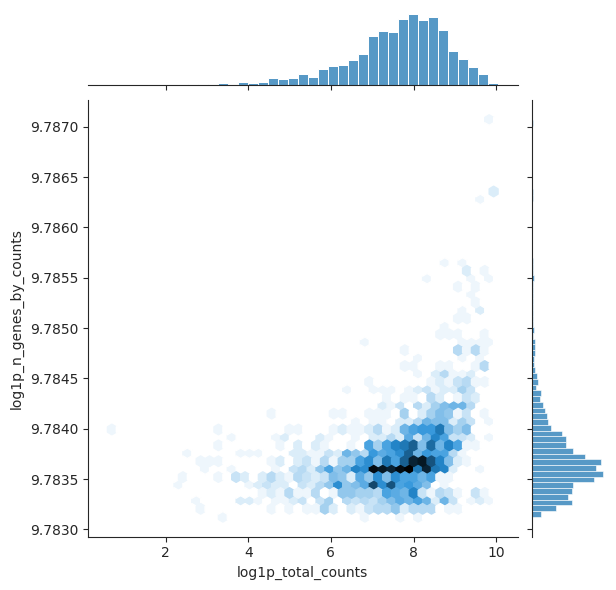

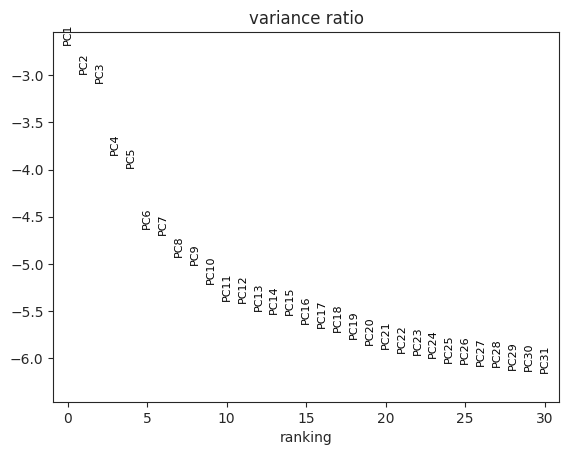

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


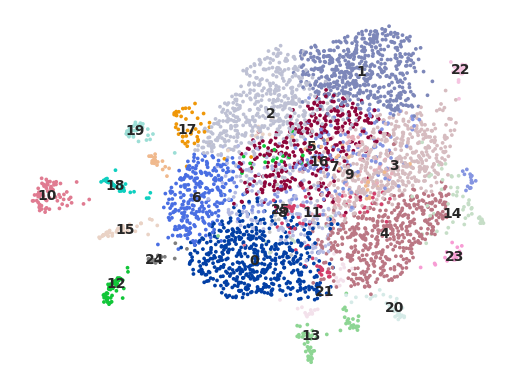


<<< CONCATENATING OBJECTS: HH03, HH04, HH05, HH06 >>>

<<< INTEGRATING WITH HARMONY >>>


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

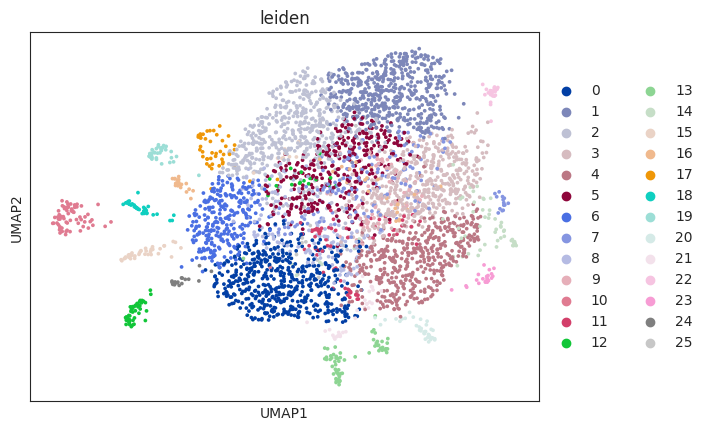

In [11]:
kws_multi = dict(kws_pp=kws_pp, kws_harmony=kws_harmony,
                 kws_cluster=kws_cluster)  # pre-integration processing
self = cr.Crispr(file_path, **kws_init, **kws_crispr,
                 kws_multi=kws_multi)  # create object

# Clustering & Annotations

Clustering was conducted in the individual objects in `cr.pp.create_object_multi()`, but we want to re-do QC and clustering in the overall sample.

## Clustering

We need to have `kws_pca=False` so that the Harmony-adjusted PCA created during integration (rather than a newly-calculated one) will be used.

In [ ]:
self.cluster(**{**kws_cluster, "kws_pca": False}, layer="log1p")

## CellTypist

Annotate cell types.

In [ ]:
_ = self.annotate_clusters(model="COVID19_HumanChallenge_Blood.pkl")
self.rna.obs

# Plots

In [ ]:
cct = "predicted_labels" if "predicted_labels" in self.rna.obs else None
clus = list(self.rna.obs[cct].sample(2))  # clusters to circle
figs = self.plot(genes=36,
                 kws_qc=True,
                 col_cell_type=cct,
                 layers="all",  # also plot "scaled" layer, for instance
                 kws_gex_violin=dict(scale="area", height=10),
                 kws_clustering=dict(col_cell_type=cct))

# Analyses

Perform perturbation-specific analyses.

## Augur

In [ ]:
cct = "majority_voting" if "majority_voting" in self.rna.obs else \
    self._columns["col_cell_type"]
_ = self.run_augur(
    col_cell_type=cct,
    # ^ will be label in self._columns by default, but can override here
    col_perturbed=self._columns["col_perturbed"],
    # ^ will be this by default if unspecified, but can override here
    key_treatment=self._keys["key_treatment"],
    # ^ will be this by default if unspecified, but can override here
    select_variance_features=True,  # filter by highly variable genes
    classifier="random_forest_classifier", n_folds=3, augur_mode="default",
    kws_umap=kws_umap, subsample_size=5, kws_augur_predict=dict(span=0.7))

## Mixscape

Classify perturbation "escapees," score perturbation responses, and find perturbation-based clusters.

In [ ]:
# col_split_by = self._columns["col_sample_id"]  # separate by sample
col_split_by = None  # calculate together
target_gene_idents = ["NOD2", "LACC1", "ATG16L1", "IL6ST"]  # plot these
_ = self.run_mixscape(col_split_by=col_split_by,
                      target_gene_idents=target_gene_idents)  # Mixscape

## Distance

Investigate distance metrics.

In [ ]:
_ = self.compute_distance(
    distance_type="edistance", method="X_pca", kws_plot=dict(
        figsize=(15, 15), robust=True), col_target_genes=self._columns[
            "col_guide_rna"] + "_original", layer="log1p")